<a href="https://colab.research.google.com/github/Harshit0722/TSF-GRIP/blob/main/Task_2_Prediction_using_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##IMPORTING LIBRARIES

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##DATA LOADING + EDA

###Loading the dataset

In [8]:
data = pd.read_csv('/content/Iris.csv')

###Analyzing data entries

In [9]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


###Checking for any class imbalances in order to make the model resilient to  biasis in such cases

In [10]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Since, all species have 50 entries each so we can move on to the further steps

In [11]:
#Checking for any unfilled entries:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

###Some basic plots to better understand correlation

In [12]:
import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(data, *[[['Id', 'SepalLengthCm'], ['SepalLengthCm', 'SepalWidthCm'], ['SepalWidthCm', 'PetalLengthCm'], ['PetalLengthCm', 'PetalWidthCm']]], **{})
chart

In [13]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data, *['PetalLengthCm'], **{})
chart

In [14]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data, *['SepalWidthCm'], **{})
chart

In [15]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data, *['SepalLengthCm'], **{})
chart

In [16]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data, *['Id'], **{})
chart

###Studying correlations in-depth

<ipython-input-17-132b24abe0ef>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data=data.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<Axes: >

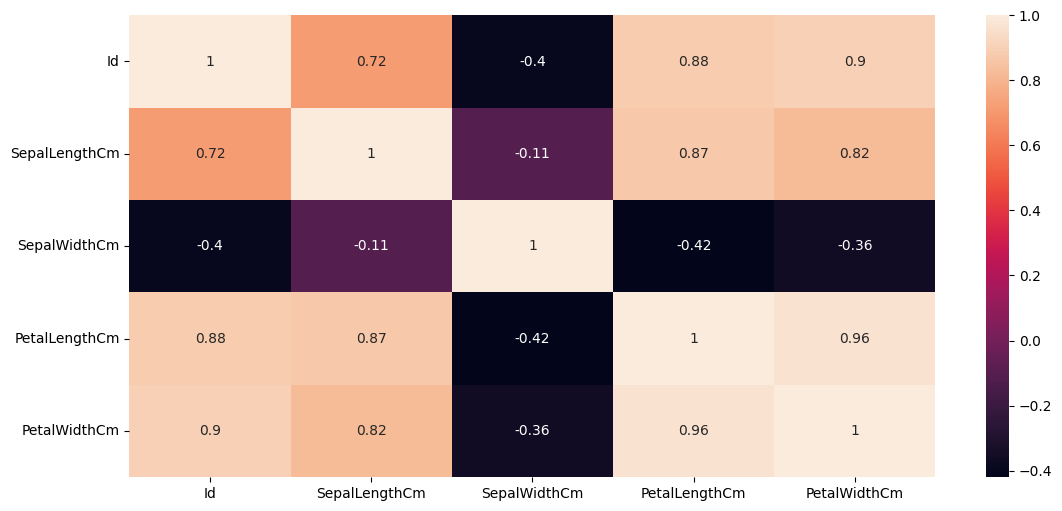

In [17]:
#Checking correlation by constructing a heatmap:
corr_data=data.corr()
display(corr_data)
plt.subplots(figsize=(13,6))
sns.heatmap(corr_data,annot=True)

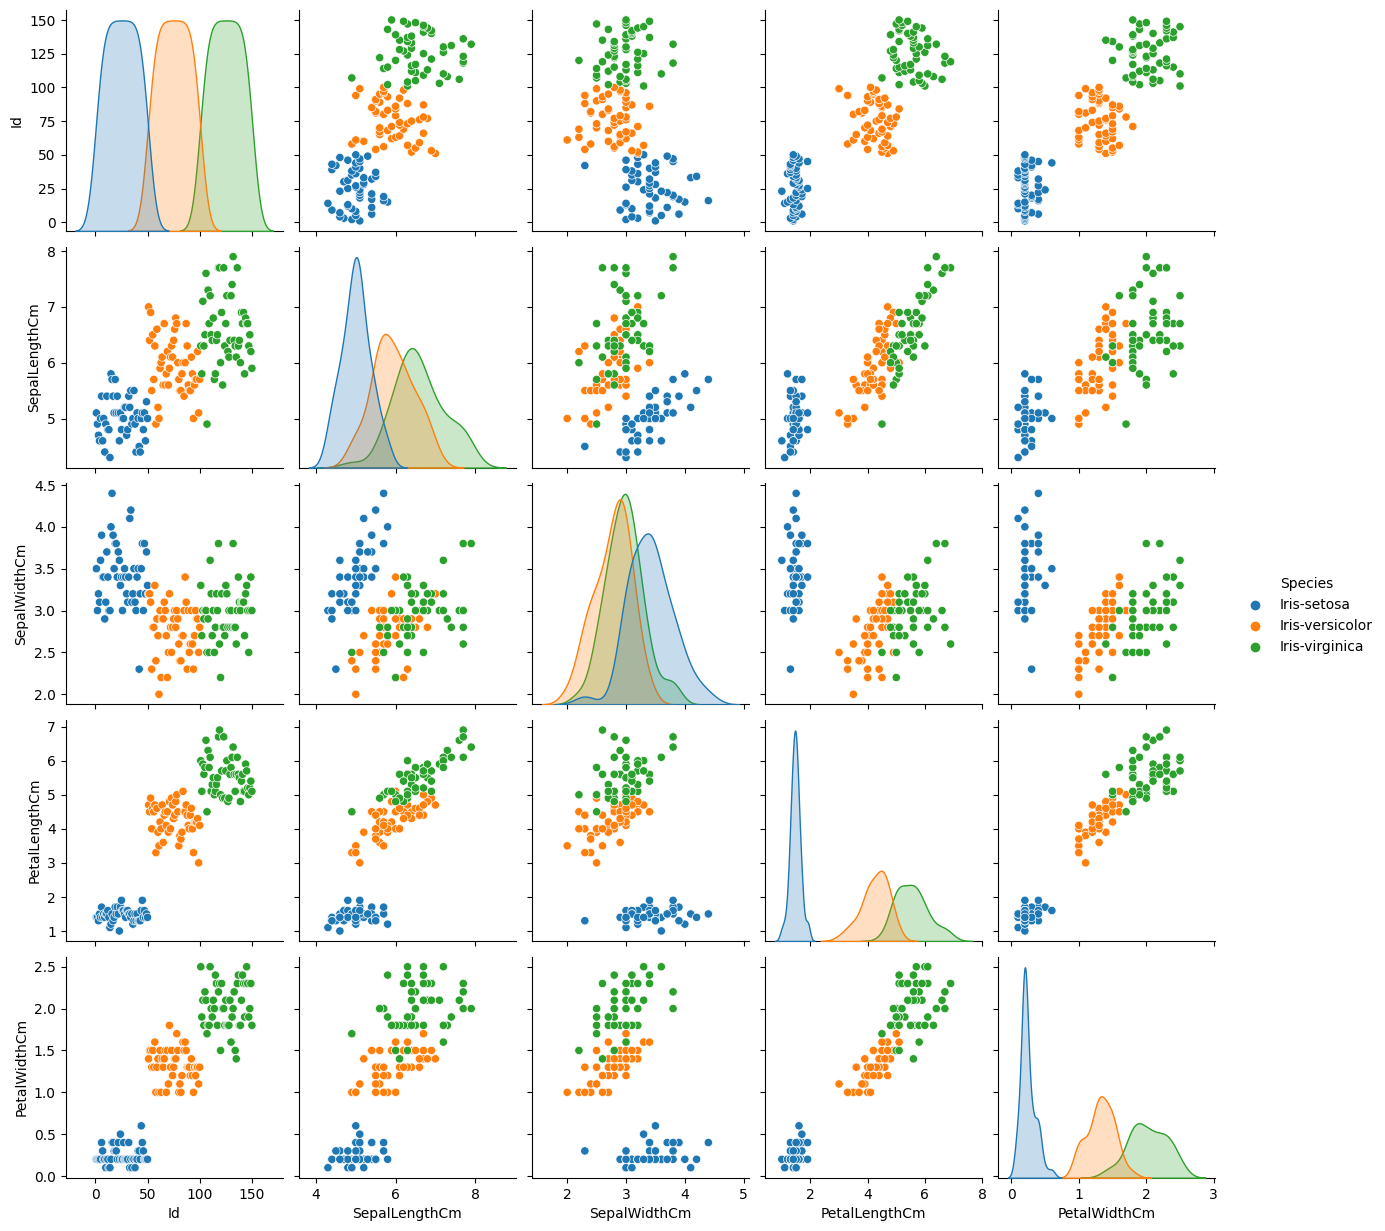

In [18]:
#Analyzing correlations based on species:-
sns.pairplot(data,hue='Species',height=2.5)
plt.show()

EDA suggests that clustering can be performed in order to get best multiclass classification results, so we analyze various clustering techniques.

##CLUSTERING

###1.) K-Means Clustering (using elbow method to determine optimum value of 'K')

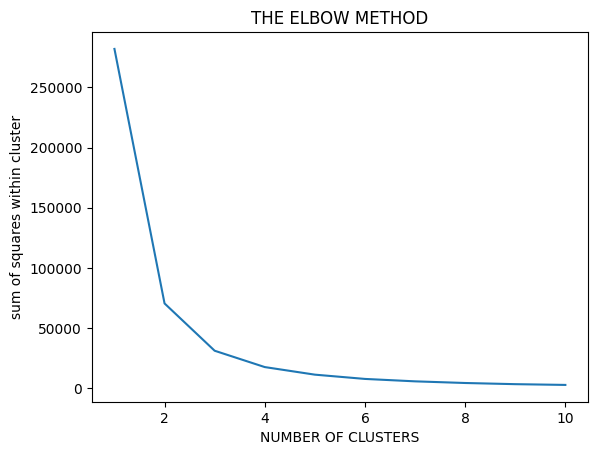

In [19]:
# Finding the optimum number of clusters for k-means classification

x = data.iloc[:, [0, 1, 2, 3]].values


from sklearn.cluster import KMeans
array = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    array.append(kmeans.inertia_)

# Plotting the results onto a line graph,
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), array)
plt.title('THE ELBOW METHOD')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('sum of squares within cluster') #Within cluster sum of squares
plt.show()

Hence, using the elbow method in KNN, Result = 3 (Optimum no. of clusters)

Training classification model

In [20]:
#Setting no. of classes as 3 and random state 42 for optimum results:
kmeans = KMeans(n_clusters = 3, random_state = 42)
y_kmeans = kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


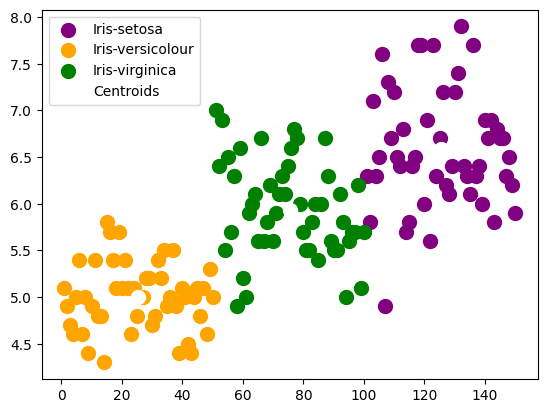

In [21]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'white', label = 'Centroids')

plt.legend()

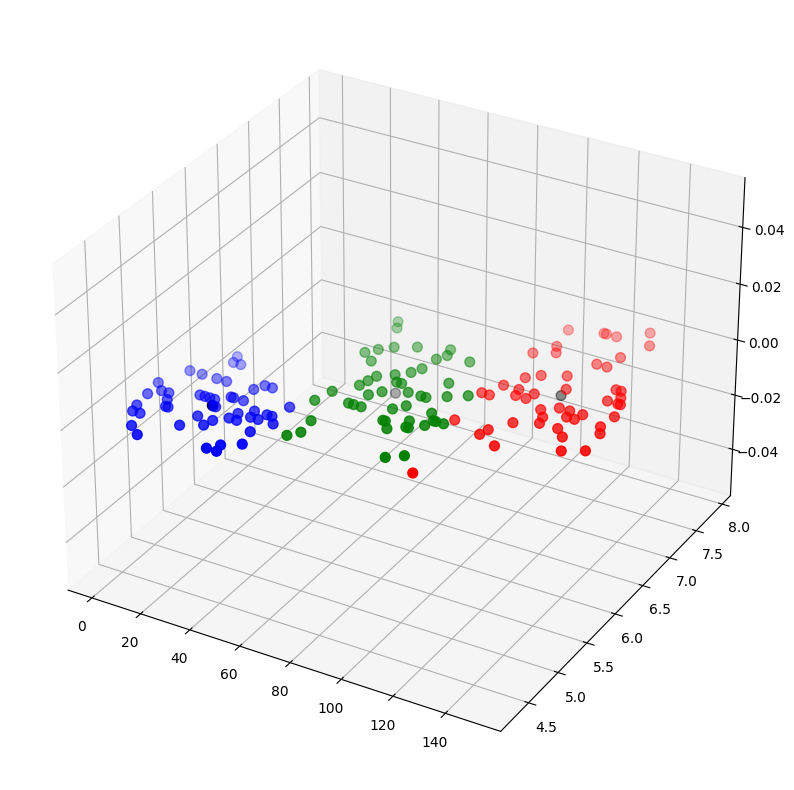

In [22]:
#Visualising the clusters in 3d
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Iris_setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Iris_versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris_virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'black', label = 'Centroids')

###2.) K-Means Clustering (using silhouette analysis to determine optimum value of 'K')

In [23]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [24]:
data = data.replace("Iris-setosa", 0)
data = data.replace("Iris-versicolor", 1)
data = data.replace("Iris-virginica", 2)

In [25]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [26]:
# Instantiate the KMeans models
km = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the KMeans model
km.fit_predict(data)

# Calculate Silhoutte Score
score = silhouette_score(data, km.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.582


Executing the above code predicts the Silhouette score of 0.582. This indicates that the clustering is reasonably good, since the Silhouette Score is closer to 1 than to -1 or 0. A Silhouette Score of 0.582 suggests that the clusters are well separated and that the objects within each cluster are relatively homogeneous.

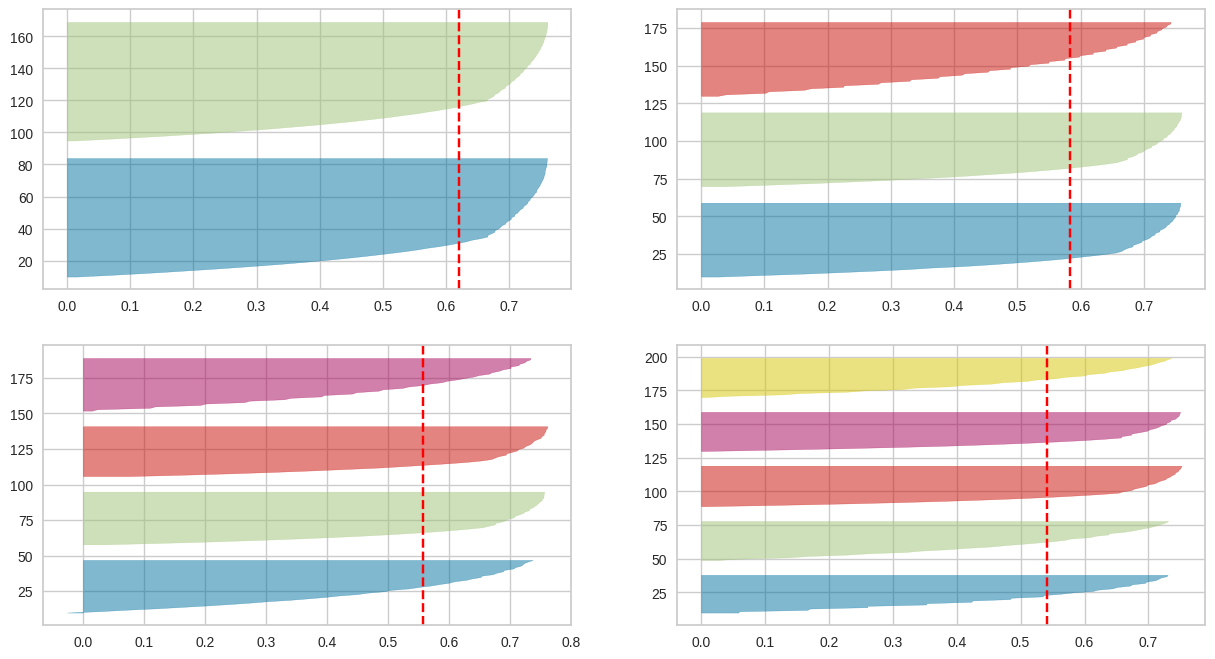

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:

    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data)

Conclusion: The value of n_clusters as 4 and 5 looks to be suboptimal for the given data due to the following reasons:
Presence of clusters with below average silhouette scores
Wide fluctuations in the size of the silhouette plots.
The value of 2 and 3 for n_clusters looks to be optimal one. The silhouette score for each cluster is above average silhouette scores. Also, the fluctuation in size is similar. The thickness of the silhouette plot representing each cluster also is a deciding point. For plot with n_cluster 3 (top right), the thickness is more uniform than the plot with n_cluster as 2 (top left) with one cluster thickness much more than the other.

**Thus, one can select the optimal number of clusters as 3.**

###3.) DBSCAN for clustering


In [28]:
type(data)

pandas.core.frame.DataFrame

In [29]:
data_LABEL_COL = 'Species'
data_FEATURES = [col for col in data.columns if col != data_LABEL_COL]
X = data[data_FEATURES]
y = data[data_LABEL_COL]

In [30]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [31]:
from sklearn import metrics
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3,min_samples=5)
y_pred = dbscan.fit_predict(X)

In [32]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
np.unique(dbscan.labels_)

array([0, 1, 2])

This suggests that there is no significant noise as the no. of outliers is near to zero on optimum epsilon value (eps)

In [34]:
len(dbscan.core_sample_indices_)

133

In [35]:
dbscan.core_sample_indices_[:10]

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [36]:
dbscan.components_[:3]

array([[3. , 4.7, 3.2, 1.3, 0.2],
       [4. , 4.6, 3.1, 1.5, 0.2],
       [5. , 5. , 3.6, 1.4, 0.2]])

In [37]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns=['pred_label']

val = pd.concat([X,y_pred_df],axis=1)

print(val)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  pred_label
0      1            5.1           3.5            1.4           0.2           0
1      2            4.9           3.0            1.4           0.2           0
2      3            4.7           3.2            1.3           0.2           0
3      4            4.6           3.1            1.5           0.2           0
4      5            5.0           3.6            1.4           0.2           0
..   ...            ...           ...            ...           ...         ...
145  146            6.7           3.0            5.2           2.3           2
146  147            6.3           2.5            5.0           1.9           2
147  148            6.5           3.0            5.2           2.0           2
148  149            6.2           3.4            5.4           2.3           2
149  150            5.9           3.0            5.1           1.8           2

[150 rows x 6 columns]


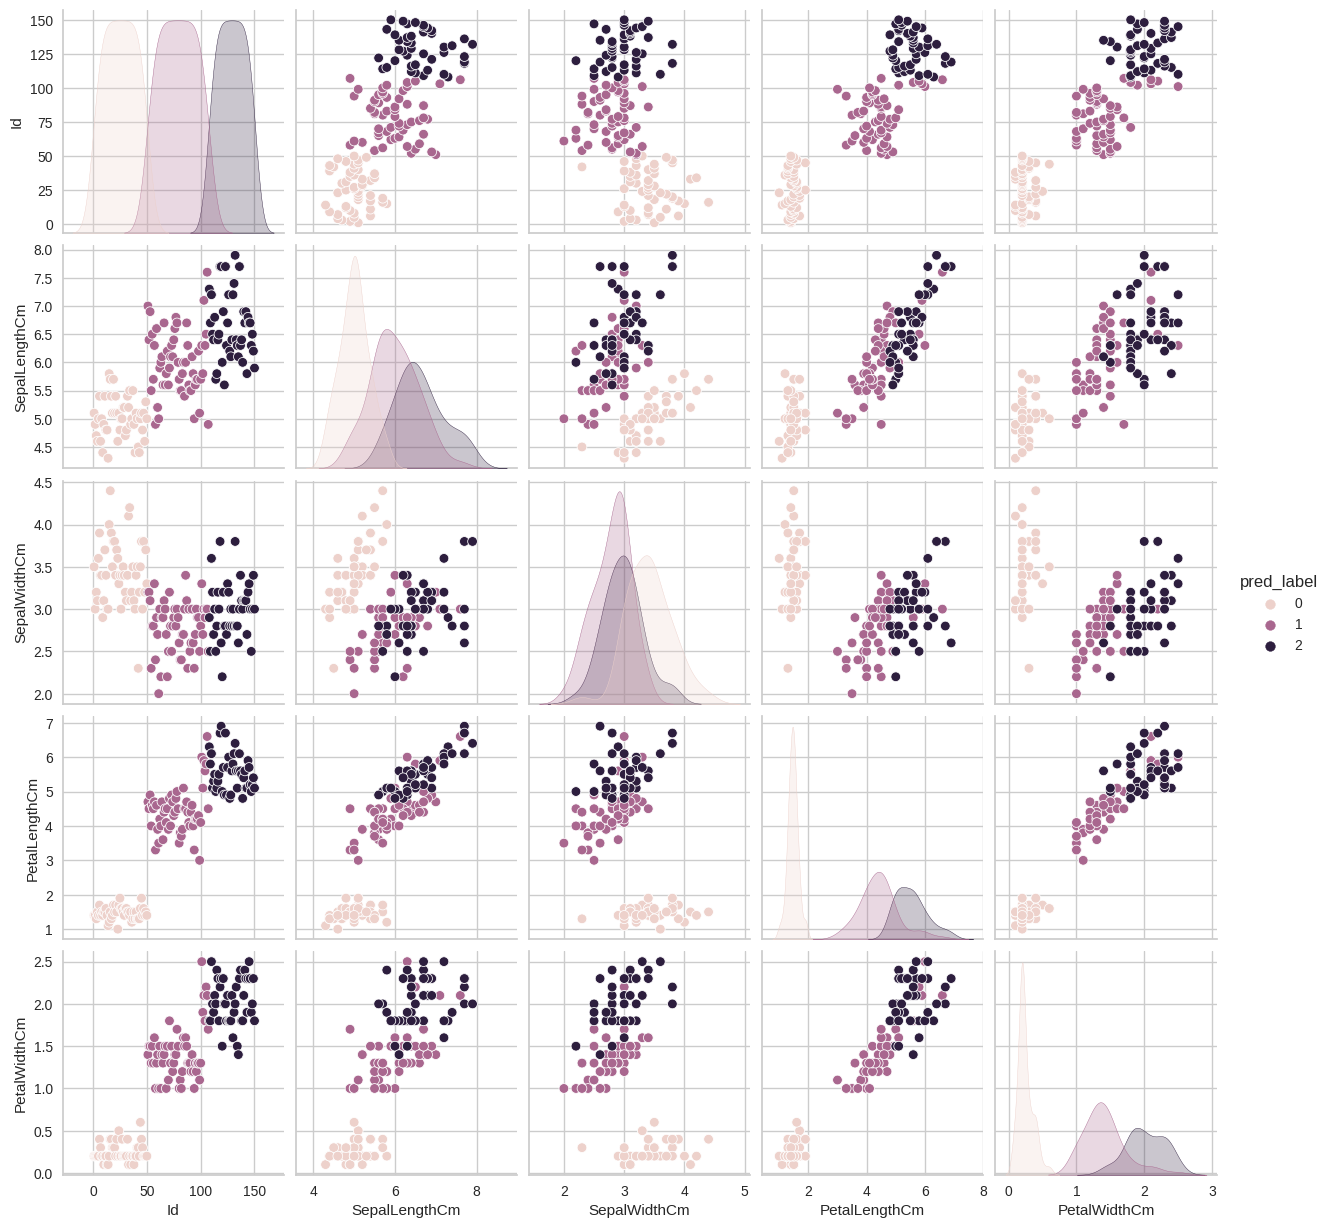

In [38]:
sns.color_palette("pastel")
sns.pairplot(val,hue='pred_label')
plt.show()

Conclusion: Optimum no. of clusters still remain 3, however, their spread is more precise and neat. Hence, DBSCAN performed better than K-means clustering in this case.